# With over 8,000 UK pages on our website, which pages should we enrich first to make the biggest impact to our user's experience?

My CEO wanted to know with over 8,000 pages on our website, which pages should we focus on enriching first to make the biggest impact to our users? Below is the data exploration, feature engineering and visualisations I created to present my recommendations and insights.


Please note that all data has been anonymised.

# 1. Import Libaries

Below we are importing all the Python libraries we will need for this project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# 2. Import Data

Here we are importing the dataset.

In [2]:
hits = pd.read_csv('~/Documents/portfolio/datasets/hits.csv') # Reading in the csv

In [3]:
hits.head()

,hits,Page Name,Page Type
0,78147,A,National
1,77981,C,National
2,66638,D,National
3,57342,E,National
4,48405,F,National


In [4]:
hits.dtypes # types of data

hits          int64
Page Name    object
Page Type    object
dtype: object

In [5]:
hits.shape # (rows, columns) in the dataset

(8468, 3)

To give a description of each variable:

<b>Hits</b> : 
the total number of views the page on our website has had from our users in 4 months. 

<b>Page Name</b> : 
name of page

<b>Page Type</b> : 
the type of page

# 3. Top Level Stats

In this section we will explore the dataset.

In [6]:
countpages = hits.drop(columns = 'hits') # dropping the hits
total_pages = countpages.groupby(['Page Type']).count() # grouping by page type and counting
total_pages_formatted = total_pages.apply(lambda x: "{:,}".format(x['Page Name']), axis=1) # formatting the numbers
print(total_pages_formatted)

Page Type
Business    4,946
Consumer    3,461
National       60
dtype: object


Above is the number of pages of each type, business has just under 5,000 whereas national has only 60.

In [7]:
total_hits = hits.groupby(['Page Type']).sum() # grouping by page type and summing the hits
total_hits['hits'] = total_hits.apply(lambda x: "{:,}".format(x['hits']), axis=1) # formatting the numbers
print(total_hits.sort_values('hits', ascending = False))

              hits
Page Type         
Business   979,428
National   788,283
Consumer   643,643


The sum of the total hits across all pages in each outlet type are shown above. Our business pages received the most views, then national and consumer.

Now let's save each page type as a new dataframe to make it easier to inspect the data further.

In [8]:
business = hits[hits['Page Type'].isin(['Business'])]
consumer = hits[hits['Page Type'].isin(['Consumer'])]
national = hits[hits['Page Type'].isin(['National'])]

national 

,hits,Page Name,Page Type
0,78147,A,National
1,77981,C,National
2,66638,D,National
3,57342,E,National
4,48405,F,National
5,39989,G,National
6,36471,H,National
7,34752,I,National
8,30561,J,National
9,30208,K,National


Visualising the national data we can see that the total number of hits for any one national page drops to below 5,000 pretty quickly. Therefore, let's explore the distribution of hits further.

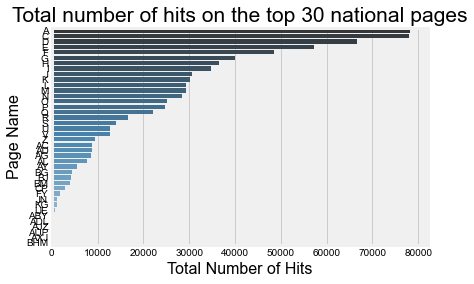

In [9]:
national2 = national.head(40)
ax = sns.barplot(x="hits", y="Page Name", data=national2, palette="Blues_d")

# Set the title.
ax.set_title('Total number of hits on the top 30 national pages', fontsize=21);

# x-axis labels
ax.set_ylabel('Page Name', fontsize=16);

# y-axis labels
ax.set_xlabel('Total Number of Hits', fontsize=16);

sns.set(rc={'figure.figsize':(25,15)})

In [10]:
national['hits'].describe() # statistical data for national pages

count       60.000000
mean     13138.050000
std      19922.516808
min          3.000000
25%        116.750000
50%       2377.500000
75%      22734.250000
max      78147.000000
Name: hits, dtype: float64

In [11]:
consumer['hits'].describe() # statistical data for consumer pages

count     3461.000000
mean       185.970240
std        706.857401
min          3.000000
25%         16.000000
50%         38.000000
75%        100.000000
max      13600.000000
Name: hits, dtype: float64

In [12]:
business['hits'].describe() # statistical data for business pages

count     4947.000000
mean       197.984233
std        495.359796
min          3.000000
25%         19.000000
50%         59.000000
75%        169.000000
max      12007.000000
Name: hits, dtype: float64

Although we can start to draw comparisons and insights from the above, we can visualise the above minimums, maximums, interquartile ranges (IQR) and outliers using the following boxplot. 

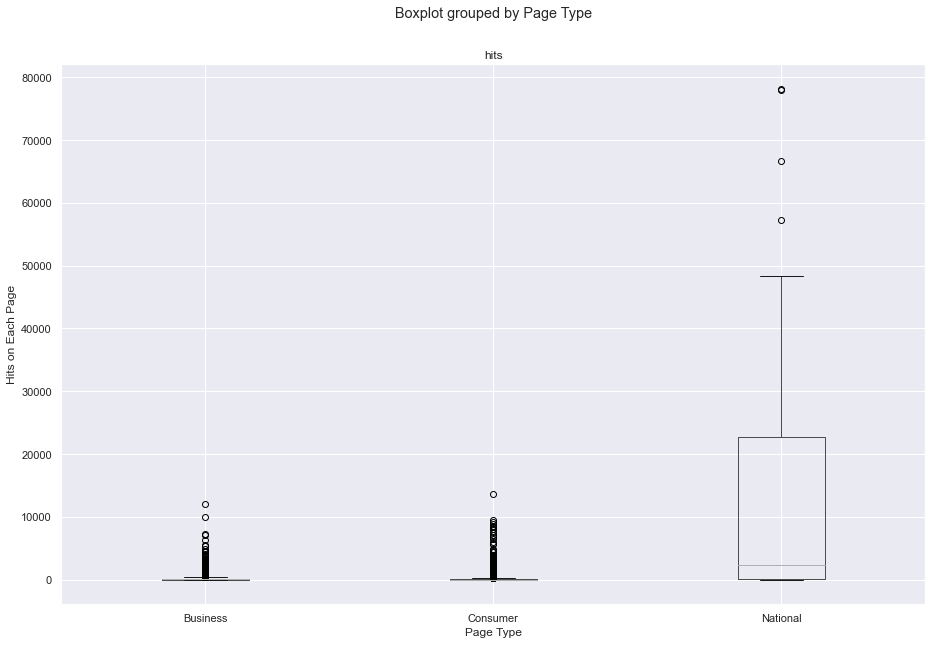

In [13]:
hits.boxplot(column='hits', by='Page Type',figsize=(15,10))

plt.xlabel('Page Type')
plt.ylabel('Hits on Each Page');

Using the above visualisation we can now clearly see the differing distribution of data amongst page types. 

The national pages although only 60 in comparison to 4,947 for business and 3,461 for consumer has the largest spread of hits, and has a maximum number of hits nearly 6 times that of consumer pages, the second highest. The IQRs are harder to see in the boxplot for business and consumer as they are close to 0, however we can see that across all page types there are outliers, meaning there are a proportion of pages that receive more hits than the maximum (which is based on the 75% + 1.5*IQR(25% to 75%)). These are the most viewed pages.

Let's take the pages that received above average hits (from the describe function above) respectively for each type.

In [14]:
a = national['hits'].mean()
b = business['hits'].mean()
c = consumer['hits'].mean()

print(a)
print(b)
print(c)

13138.05
197.9842328684051
185.97023981508235


In [15]:
national[national['hits'] > 13138 ].count() # the number of national pages that received above average hits

hits         18
Page Name    18
Page Type    18
dtype: int64

In [16]:
national2 = national.head(18) # saving these pages as a new dataframe

In [18]:
business[business['hits'] > 198 ].count() # the number of business pages that received above average hits

hits         1080
Page Name    1079
Page Type    1080
dtype: int64

In [19]:
business2 = business.head(1080) # saving these pages as a new dataframe

In [20]:
consumer[consumer['hits'] > 186 ].count() # the number of consumer pages that received above average hits

hits         503
Page Name    503
Page Type    503
dtype: int64

In [21]:
consumer2 = consumer.head(503) # saving these pages as a new dataframe

In [106]:
print("{:.2%}".format(((national2['hits'].sum())+(business2['hits'].sum())+(consumer2['hits'].sum()))/
((national['hits'].sum())+(business['hits'].sum())+(consumer['hits'].sum())))) # the percentage of total 

81.66%


The sum of hits on the top 1,601 pages account for nearly 82% of all hits. 

# 4. Calculations

The following cells show how I put the calculations together to form part of my recommendations. 

In [108]:
# taking the combine number of pages that have above average hits for each outlet type from the steps above to show 
# the percentge of the total outlets I propose to enrich.

pages_to_enrich = (18 + 1080 + 503)/hits.count().loc[('hits')]
print("{:.2%}".format(pages_to_enrich))

18.91%


In [23]:
# National 

topnational1 = (national2['hits'].count()/national['hits'].count())  # calculating the percentage of national 
# pages with hits above the average of the group

topnational = (national2['hits'].sum()/national['hits'].sum()) # calculating the percentage of the sum of hits of 
# the smaller subset of national pages from above of the full data of hits for national pages. 

print("The top " + "{:.2%}".format(topnational1)+ " of national pages account for " 
      + "{:.2%}".format(topnational)+ " of the total hits for national pages.");

# Business

topbusiness1 = (business2['hits'].count()/business['hits'].count()) # calculating the percentage of business 
# pages with hits above the average of the group

topbusiness = (business2['hits'].sum()/business['hits'].sum()) # calculating the percentage of the sum of hits of 
# the smaller subset of business pages from above of the full data of hits for business pages. 

print("The top " + "{:.2%}".format(topbusiness1)+ " of business pages account for " 
      + "{:.2%}".format(topbusiness)+ " of the total hits for business pages.");

# Consumer

topconsumer1 = (consumer2['hits'].count()/consumer['hits'].count()) # calculating the percentage of consumer 
# pages with hits above the average of the group

topconsumer = (consumer2['hits'].sum()/consumer['hits'].sum()) # calculating the percentage of the sum of hits of 
# the smaller subset of consumer pages from above of the full data of hits for consumer pages. 

print("The top " + "{:.2%}".format(topconsumer1)+ " of consumer pages account for " 
      + "{:.2%}".format(topconsumer)+ " of the total hits for consumer pages.");

The top 30.00% of national pages account for 87.54% of the total hits for national pages.
The top 21.83% of business pages account for 78.16% of the total hits for business pages.
The top 14.53% of consumer pages account for 79.77% of the total hits for consumer pages.


# 5. Recommendations

I recommend that we focus our time on enriching 18.9% of our UK national, business and consumer pages on our website, as these are the pages with views above the average for the respective page types, and therefore of most interest to our users.   

The plot below shows the nationals have the largest range of usage hits and the most extreme outliers (shown by the blue dots to the right of the graph), the highest being 78,147. Whereas, consumer and business pages all have hits below 14,000 with the majority being more concentrated around their means. 

Therefore, the breakdown of the 1,601 outlets that we should focus on are:

- The top 30.00% (18) of the national pages as they account for 87.54% of the total hits on national pages.
- The top 21.83% (1,080) of the business pages as they account for 78.16% of the total hits on business pages.
- The top 14.53% (503) of the consumer pages account for 79.77% of the total hits on consumer pages.

Ensuring that these 1,601 pages contain full, up to date and accurate content we will be impacting nearly 82% of the total views on our UK pages in the last 4 months. 

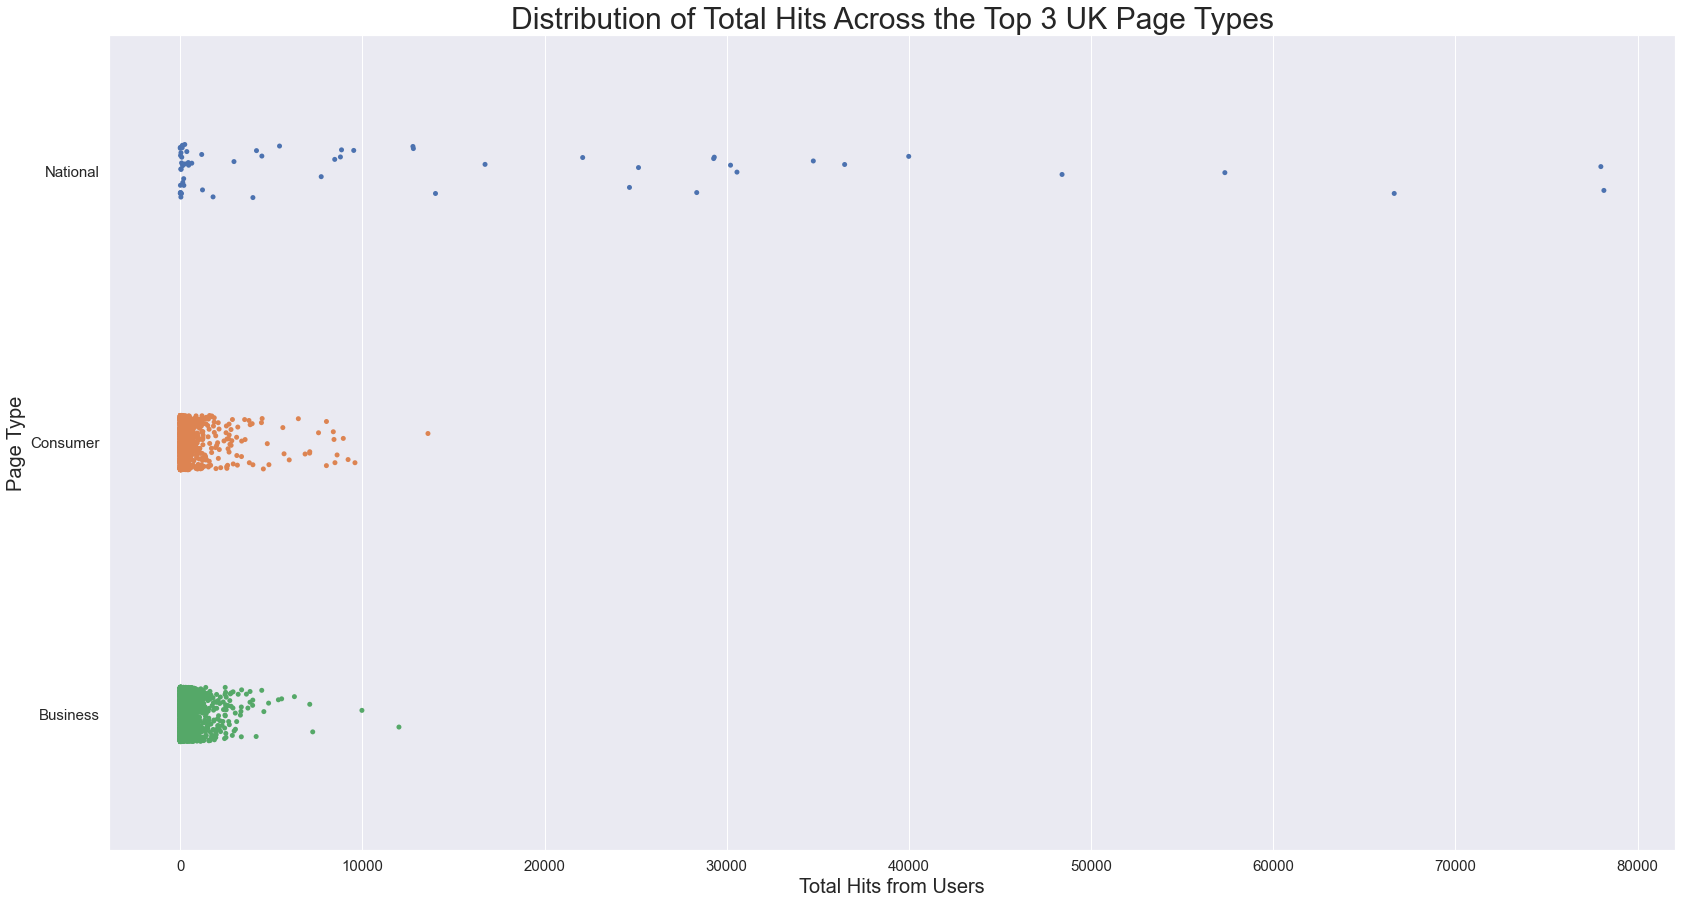

In [114]:
top = sns.stripplot(x=hits['hits'], y=hits['Page Type']);

top.axes.set_title("Distribution of Total Hits Across the Top 3 UK Page Types",fontsize=30)
top.set_xlabel("Total Hits from Users",fontsize=20)
top.set_ylabel("Page Type",fontsize=20)
top.tick_params(labelsize=15)

sns.set(rc={'figure.figsize':(25,15)})

# 6. Actions from my recommendations

From my recommendations my CEO assigned an enrichment project to our content data team and sent the following bulletin around our company: 'Project 1600:  We have identified the top 1,600 pages that generate 82% of clients focus.  We will start work this week going through all the UK nationals and enriching pages. Then we will move to consumer and B2B.'